In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import sklearn
import warnings

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [32]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(20)

,reviews
0,✅ Trip Verified | 4/4 flights we booked this ...
1,✅ Trip Verified | British Airways has a total...
2,"✅ Trip Verified | London Heathrow to Keflavik,..."
3,✅ Trip Verified | Mumbai to London Heathrow in...
4,✅ Trip Verified | Care and support shocking. ...
5,✅ Trip Verified | Flying A380 business class ...
6,✅ Trip Verified | British Airways absolutely ...
7,✅ Trip Verified | My recent experience with B...
8,✅ Trip Verified | This is to express our disp...
9,✅ Trip Verified | I flew London to Malaga on ...


In [7]:
df.to_csv('file1.csv')

In [10]:
df.isnull()

,reviews
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [15]:
df.isnull().any()

reviews    False
dtype: bool

In [13]:
df.isnull().sum()

reviews    0
dtype: int64

In [16]:
df.isnull().any().sum()

0

In [22]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | 4/4 flights we booked this ...
freq,1


In [17]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [54]:

# filtering the rows which says trip  not verified
df1 = df[df['reviews'].str.contains('Not Verified ')]
print(df1)


                                               reviews
13   Not Verified |  BA cancelled our flight and co...
21   Not Verified |  Flight delayed by an hour, it ...
22   Not Verified | The staff are very rude and not...
24   Not Verified | Failed at all basic travel fund...
36   Not Verified | I booked Premium Economy from I...
..                                                 ...
891  Not Verified |  Flew out of Heathrow on 22nd F...
906  Not Verified |  London to Tampa. BA broke my s...
923  Not Verified |  I've always favoured British A...
958  Not Verified |  Gatwick to Tenerife. This airc...
981  Not Verified |  Nassau to London. Premium Econ...

[203 rows x 1 columns]


In [66]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [70]:
pip install nltk

In [76]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()
df = pd.read_csv('/content/file1.csv', usecols = ['reviews'])
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['reviews']]
df['sentiment_score'] = polarity
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,sentiment_score
0,✅ Trip Verified | 4/4 flights we booked this ...,-0.27
1,✅ Trip Verified | British Airways has a total...,-0.84
2,"✅ Trip Verified | London Heathrow to Keflavik,...",0.72
3,✅ Trip Verified | Mumbai to London Heathrow in...,0.97
4,✅ Trip Verified | Care and support shocking. ...,-0.08


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [85]:

df["sentiment_score"].describe()

count    1000.000000
mean        0.045840
std         0.786033
min        -1.000000
25%        -0.780000
50%         0.030000
75%         0.910000
max         1.000000
Name: sentiment_score, dtype: float64

In [91]:

# function to analyze the reviews
def analysis(sentiment_score):
    if sentiment_score < 0:
        return 'Negative'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [92]:
#Negative reviews
df.loc[df["sentiment_score"] <0]


,reviews,sentiment_score
0,✅ Trip Verified | 4/4 flights we booked this ...,-0.27
1,✅ Trip Verified | British Airways has a total...,-0.84
4,✅ Trip Verified | Care and support shocking. ...,-0.08
5,✅ Trip Verified | Flying A380 business class ...,-0.95
6,✅ Trip Verified | British Airways absolutely ...,-0.93
...,...,...
995,✅ Trip Verified | Buenos Aires to London. We ...,-0.74
996,✅ Trip Verified | Business Class space is rid...,-0.60
997,✅ Trip Verified | Aberdeen to Heathrow to con...,-0.48
998,✅ Trip Verified | I would not recommend this a...,-0.85


In [93]:
#print positive reviews
df.loc[df["sentiment_score"]>0]

,reviews,sentiment_score
2,"✅ Trip Verified | London Heathrow to Keflavik,...",0.72
3,✅ Trip Verified | Mumbai to London Heathrow in...,0.97
7,✅ Trip Verified | My recent experience with B...,0.71
8,✅ Trip Verified | This is to express our disp...,0.67
15,"✅ Trip Verified | Nice flight, good crew, very...",0.92
...,...,...
988,✅ Trip Verified | Vancouver to London Heathro...,0.90
989,✅ Trip Verified | Boston to Nairobi via Londo...,0.39
992,✅ Trip Verified | London to Boston. I was sea...,0.93
993,✅ Trip Verified | Stockholm to London. Standar...,0.96


In [95]:
df.loc[df["sentiment_score"]==0] #Neutral reviews

,reviews,sentiment_score
18,✅ Trip Verified | Ground and cabin crew alway...,0.0
222,"✅ Trip Verified | British Airways is late, th...",0.0
430,✅ Trip Verified | After 1h queuing at the che...,0.0
532,✅ Trip Verified | At check-in desk at T5 Heat...,-0.0
555,✅ Trip Verified | I am flying London to Seatt...,0.0


In [98]:
import matplotlib.pyplot as plt

In [118]:
data =['Positive','Negative','Neutral']
df2=pd.DataFrame(data , columns =['Analysis'])
df2['count']=[504,491,5]

In [119]:
df2

,Analysis,count
0,Positive,504
1,Negative,491
2,Neutral,5


<BarContainer object of 3 artists>

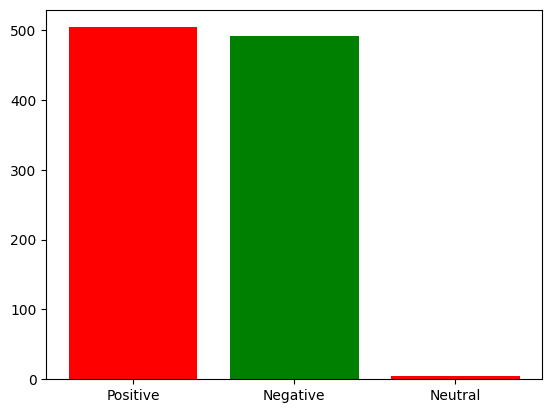

In [165]:
left=[1,2,3]
height=df2['count']
tick_label=['Positive','Negative','Neutral']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])


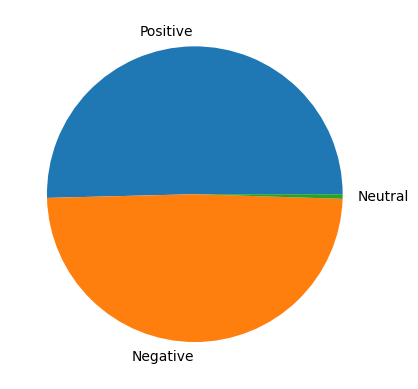

In [158]:
plt.pie(height, labels = tick_label)

# show plot
plt.show()
